# Customer Churn Model

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv("Esko_Customer_churn.csv", index_col="customerID")
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Converter,Yes,8,4,No,No,29,Yes,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,Brand_Owner,No,10,2,No,No,42,No,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,Brand_Owner,No,14,3,No,No,13,Yes,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,Brand_Owner,No,8,3,No,Yes,45,No,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,Converter,No,15,6,No,No,45,Yes,0,1,0,0,19031070,1,37,0,19,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
Type                     7043 non-null object
Partner                  7043 non-null object
tenure                   7043 non-null int64
NoOfProductsPurchased    7043 non-null int64
MultipleLicense          7043 non-null object
TechSupport              7043 non-null object
TimeSinceLastUpgrade     7043 non-null int64
PaperlessBilling         7043 non-null object
Region_USA               7043 non-null int64
Region_Asia              7043 non-null int64
Region_Europe            7043 non-null int64
Region_Africa            7043 non-null int64
TotalCharges             7043 non-null int64
Rating                   7043 non-null int64
IssuesReported           7043 non-null int64
Underusage               7043 non-null int64
AverageResolutionTime    7043 non-null int64
Churn                    7043 non-null int64
dtypes: int64(13), object(5)
memory usage: 1.0+ MB


In [95]:
df.describe()

,tenure,NoOfProductsPurchased,TimeSinceLastUpgrade,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,8.006673,3.512282,24.455630,0.245350,0.249042,0.255999,0.249610,1.057846e+07,2.989919,25.552463,0.497231,50.844810,0.501065
std,4.286507,1.716638,13.914806,0.430325,0.432489,0.436452,0.432818,5.464798e+06,1.407888,14.412776,0.500028,28.864601,0.500034
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.008551e+06,1.000000,1.000000,0.000000,1.000000,0.000000
25%,4.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.845689e+06,2.000000,13.000000,0.000000,26.000000,0.000000
50%,8.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.068131e+07,3.000000,26.000000,0.000000,51.000000,1.000000
75%,12.000000,5.000000,36.000000,0.000000,0.000000,1.000000,0.000000,1.524959e+07,4.000000,38.000000,1.000000,76.000000,1.000000
max,15.000000,6.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.999723e+07,5.000000,50.000000,1.000000,100.000000,1.000000


In [5]:
df.columns

Index(['Type', 'Partner', 'tenure', 'NoOfProductsPurchased', 'MultipleLicense',
       'TechSupport', 'TimeSinceLastUpgrade', 'PaperlessBilling', 'Region_USA',
       'Region_Asia', 'Region_Europe', 'Region_Africa', 'TotalCharges',
       'Rating', 'IssuesReported', 'Underusage', 'AverageResolutionTime',
       'Churn'],
      dtype='object')

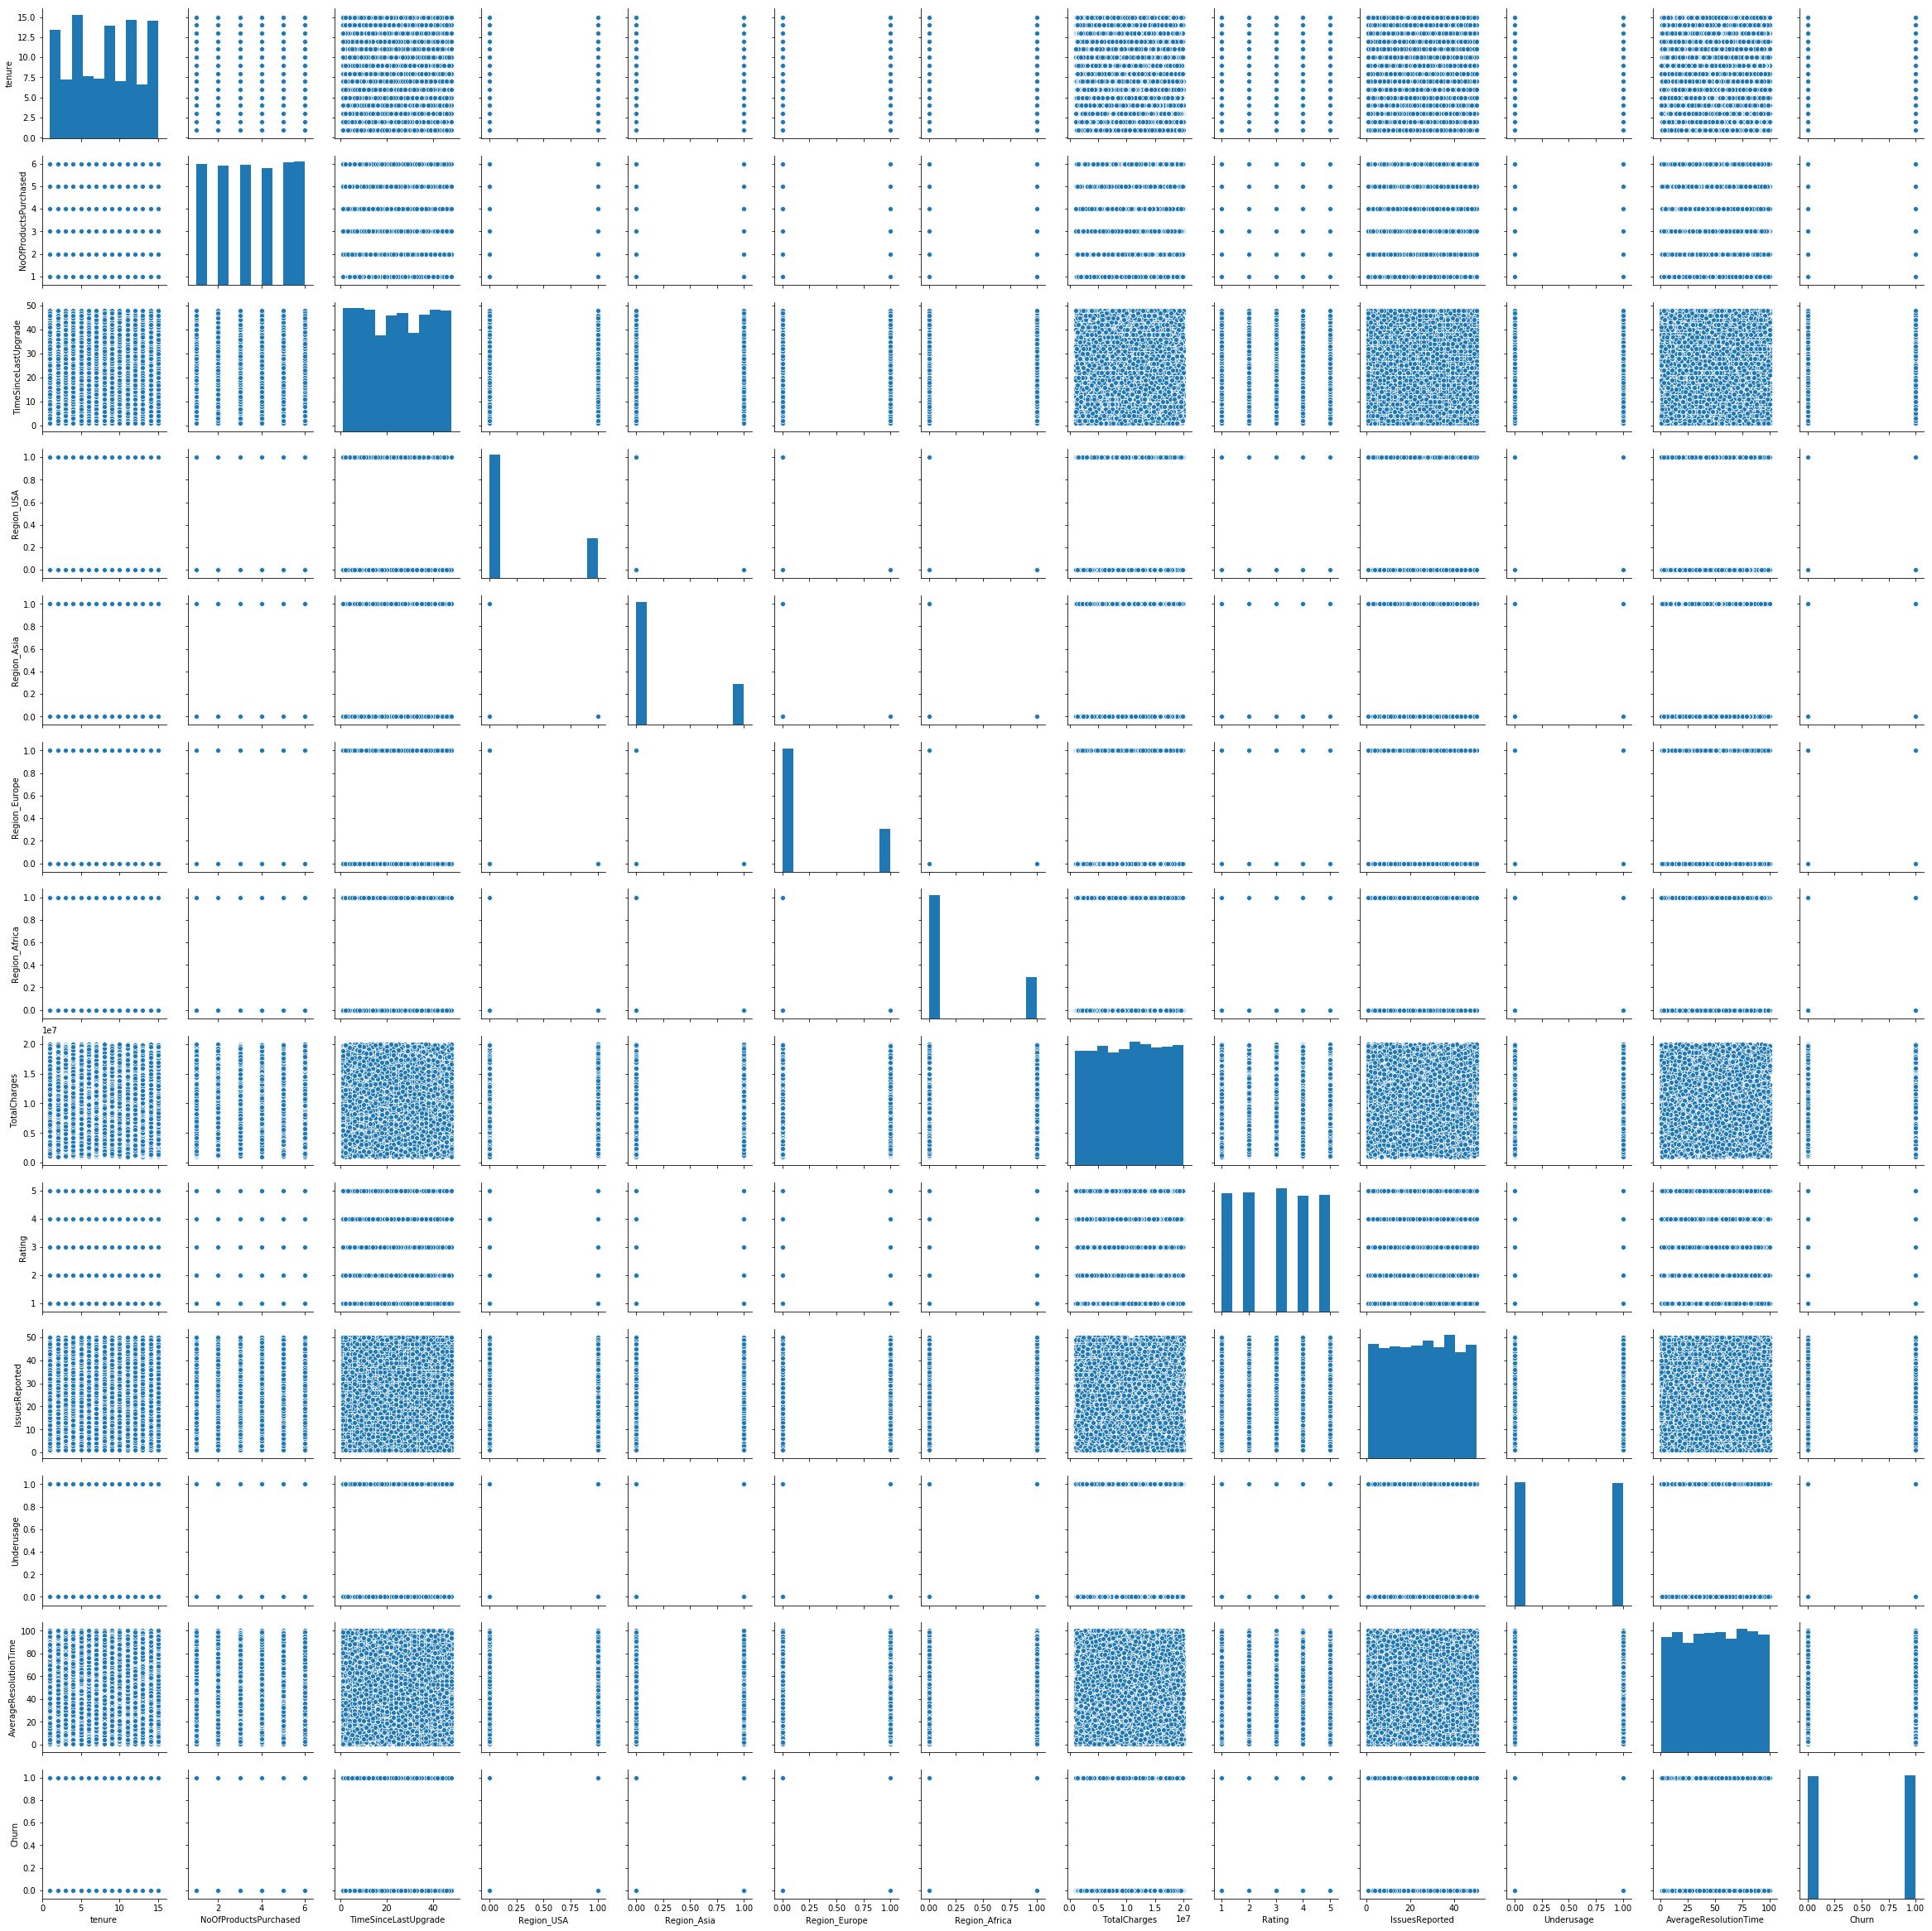

In [6]:
sns.pairplot(df)

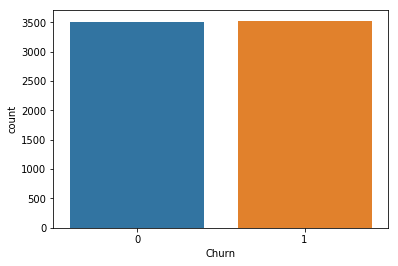

In [7]:
sns.countplot(df['Churn'])

In [8]:
df.corr()

,tenure,NoOfProductsPurchased,TimeSinceLastUpgrade,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
tenure,1.000000,0.003009,0.012455,-0.011897,0.000176,0.020188,-0.008705,-0.000408,0.002199,0.009824,0.013756,-0.015688,0.021893
NoOfProductsPurchased,0.003009,1.000000,0.006843,0.027831,-0.007755,0.001773,-0.021710,-0.006863,-0.009144,-0.020079,0.018858,-0.013599,0.008463
TimeSinceLastUpgrade,0.012455,0.006843,1.000000,-0.001454,-0.013549,0.002093,0.012874,0.009601,0.006983,0.002126,-0.002013,-0.000063,-0.027245
Region_USA,-0.011897,0.027831,-0.001454,1.000000,-0.328358,-0.334466,-0.328857,-0.004287,-0.004121,-0.008532,-0.001462,-0.008938,0.007365
Region_Asia,0.000176,-0.007755,-0.013549,-0.328358,1.000000,-0.337800,-0.332135,0.007229,0.014152,-0.003532,-0.009944,0.014551,-0.015016
Region_Europe,0.020188,0.001773,0.002093,-0.334466,-0.337800,1.000000,-0.338313,0.000511,-0.022145,0.007922,0.024396,0.004236,0.000377
Region_Africa,-0.008705,-0.021710,0.012874,-0.328857,-0.332135,-0.338313,1.000000,-0.003476,0.012286,0.004024,-0.013210,-0.009925,0.007302
TotalCharges,-0.000408,-0.006863,0.009601,-0.004287,0.007229,0.000511,-0.003476,1.000000,0.015131,0.004204,0.008107,0.005580,-0.018686
Rating,0.002199,-0.009144,0.006983,-0.004121,0.014152,-0.022145,0.012286,0.015131,1.000000,-0.004596,-0.011437,0.019303,0.006974
IssuesReported,0.009824,-0.020079,0.002126,-0.008532,-0.003532,0.007922,0.004024,0.004204,-0.004596,1.000000,0.017660,-0.012839,-0.001175


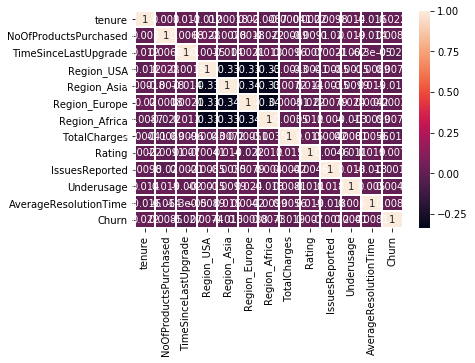

In [99]:
sns.heatmap(df.corr(), annot=True, linewidths=1)

In [10]:
def replaceType(x):
    if x == 'Converter':
        return 0
    elif x == 'Brand_Owner':
        return 1

# Handling INPUT DATA

In [11]:
df['Type'].head()

customerID
7590-VHVEG      Converter
5575-GNVDE    Brand_Owner
3668-QPYBK    Brand_Owner
7795-CFOCW    Brand_Owner
9237-HQITU      Converter
Name: Type, dtype: object

In [12]:
df['Type'] = df['Type'].apply(replaceType)

In [13]:
#df = df.drop('gender', axis=1)
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,Yes,8,4,No,No,29,Yes,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,No,10,2,No,No,42,No,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,No,14,3,No,No,13,Yes,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,No,8,3,No,Yes,45,No,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,No,15,6,No,No,45,Yes,0,1,0,0,19031070,1,37,0,19,0


In [14]:
def replaceInput(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0

In [15]:
#Handling Partner
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['Partner'] = df['Partner'].apply(replaceInput)

In [17]:
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,No,No,29,Yes,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,No,No,42,No,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,No,No,13,Yes,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,No,Yes,45,No,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,No,No,45,Yes,0,1,0,0,19031070,1,37,0,19,0


In [18]:
df['MultipleLicense'] = df['MultipleLicense'].apply(replaceInput)

In [19]:
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,0,No,29,Yes,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,0,No,42,No,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,0,No,13,Yes,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,0,Yes,45,No,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,0,No,45,Yes,0,1,0,0,19031070,1,37,0,19,0


In [20]:
df['TechSupport'] = df['TechSupport'].apply(replaceInput)

In [21]:
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,0,0,29,Yes,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,0,0,42,No,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,0,0,13,Yes,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,0,1,45,No,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,0,0,45,Yes,0,1,0,0,19031070,1,37,0,19,0


In [22]:
df['PaperlessBilling'] = df['PaperlessBilling'].apply(replaceInput)

In [23]:
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,0,0,29,1,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,0,0,42,0,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,0,0,13,1,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,0,1,45,0,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,0,0,45,1,0,1,0,0,19031070,1,37,0,19,0


In [24]:
df

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,0,0,29,1,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,0,0,42,0,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,0,0,13,1,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,0,1,45,0,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,0,0,45,1,0,1,0,0,19031070,1,37,0,19,0
9305-CDSKC,0,0,14,6,1,0,28,1,1,0,0,0,13068521,3,24,1,34,1
1452-KIOVK,1,0,4,5,1,0,6,1,0,0,1,0,4219916,2,41,1,5,0
6713-OKOMC,0,0,7,6,0,0,33,0,0,1,0,0,12244233,1,5,0,44,1
7892-POOKP,0,1,5,3,1,1,26,1,0,0,1,0,18682418,2,40,1,26,1


In [25]:
df.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime,Churn
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,8,4,0,0,29,1,0,0,1,0,9775559,1,3,1,99,1
5575-GNVDE,1,0,10,2,0,0,42,0,1,0,0,0,9271908,2,1,0,45,1
3668-QPYBK,1,0,14,3,0,0,13,1,1,0,0,0,16566467,4,9,0,1,0
7795-CFOCW,1,0,8,3,0,1,45,0,0,0,0,1,13389561,3,41,1,23,0
9237-HQITU,0,0,15,6,0,0,45,1,0,1,0,0,19031070,1,37,0,19,0


In [26]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# SPLITTING THE DATASET INTO TRAIN AND TEST

In [27]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 200)

In [28]:
X_train

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime
customerID,,,,,,,,,,,,,,,,,
0374-FIUCA,1,1,5,6,0,0,13,1,0,0,0,1,3020668,1,11,1,65
6906-MPARY,1,0,2,5,0,1,22,1,0,1,0,0,19995519,3,50,0,45
9237-HQITU,0,0,15,6,0,0,45,1,0,1,0,0,19031070,1,37,0,19
5364-XYIRR,1,1,14,6,1,0,43,1,0,0,0,1,4661478,4,13,0,7
2208-UGTGR,1,0,12,2,1,0,33,0,0,0,1,0,9851978,3,35,0,37
1734-ZMNTZ,0,1,11,3,1,0,19,0,0,1,0,0,15475129,2,13,0,29
2749-CTKAJ,1,1,14,5,0,0,7,0,0,0,1,0,3714757,1,33,1,1
4786-UKSNZ,1,0,6,6,0,0,40,0,0,0,0,1,10267410,5,39,1,67
2107-FBPTK,0,0,11,1,1,0,34,1,0,0,0,1,15040192,5,25,0,60


In [29]:
y_train

customerID
0374-FIUCA    0
6906-MPARY    1
9237-HQITU    0
5364-XYIRR    1
2208-UGTGR    1
1734-ZMNTZ    1
2749-CTKAJ    1
4786-UKSNZ    1
2107-FBPTK    0
6772-KSATR    0
3750-RNQKR    0
5018-HEKFO    0
7245-NIIWQ    1
6407-GSJNL    0
4513-CXYIX    1
8822-KNBHV    1
9348-YVOMK    0
1769-GRUIK    0
3315-IKYZQ    0
6804-GDMOI    1
6585-WCEWR    0
8387-MOJJT    1
1680-VDCWW    1
3423-HHXAO    0
4908-XAXAY    1
3565-UNOCC    1
2080-SRCDE    1
0959-WHOKV    0
8098-LLAZX    1
5138-WVKYJ    1
             ..
5889-LFOLL    0
8100-HZZLJ    1
4816-LXZYW    1
3677-TNKIO    1
7369-TRPFD    0
6546-OPBBH    0
9317-WZPGV    0
6631-HMANX    0
0480-KYJVA    0
6082-GLJIX    0
9298-WGMRW    1
3481-JHUZH    1
7718-UPSKJ    1
2141-RRYGO    1
1222-LRYKO    0
9174-IHETN    0
2719-BDAQO    0
8879-XUAHX    1
1024-GUALD    1
8778-LMWTJ    0
4075-WKNIU    1
9318-NKNFC    0
7993-NQLJE    0
3027-ZTDHO    0
2642-DTVCO    0
9512-PHSMG    0
3640-PHQXK    0
5125-CNDSP    0
7544-ZVIKX    1
4450-MDZFX    1
Name: Churn, 

# LOGISTIC REGRESSION

In [30]:
# Import Libraries
from sklearn.linear_model import LogisticRegression

In [31]:
#Build Model
logreg = LogisticRegression()


In [32]:
X_train.head()

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime
customerID,,,,,,,,,,,,,,,,,
0374-FIUCA,1,1,5,6,0,0,13,1,0,0,0,1,3020668,1,11,1,65
6906-MPARY,1,0,2,5,0,1,22,1,0,1,0,0,19995519,3,50,0,45
9237-HQITU,0,0,15,6,0,0,45,1,0,1,0,0,19031070,1,37,0,19
5364-XYIRR,1,1,14,6,1,0,43,1,0,0,0,1,4661478,4,13,0,7
2208-UGTGR,1,0,12,2,1,0,33,0,0,0,1,0,9851978,3,35,0,37


In [33]:
logreg.fit(X_train, y_train)

D:\Anaconda_Installation\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
logreg.score(X_test, y_test)

0.5106483672503549

In [35]:
t_predictions = logreg.predict(X_test)
t_predictions

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
type(t_predictions)

numpy.ndarray

In [37]:
cust_test = X_test.iloc[1]
cust_test

Type                            0
Partner                         0
tenure                         10
NoOfProductsPurchased           3
MultipleLicense                 1
TechSupport                     0
TimeSinceLastUpgrade           38
PaperlessBilling                0
Region_USA                      0
Region_Asia                     0
Region_Europe                   0
Region_Africa                   1
TotalCharges             13739291
Rating                          5
IssuesReported                 24
Underusage                      0
AverageResolutionTime          87
Name: 6732-FZUGP, dtype: int64

# THE RESULT

In [38]:

t_pred = pd.Series(t_predictions)
t_pred

0       1
1       0
2       0
3       0
4       0
5       0
6       1
7       0
8       1
9       1
10      1
11      0
12      1
13      0
14      1
15      0
16      1
17      1
18      1
19      1
20      1
21      1
22      0
23      1
24      0
25      1
26      0
27      0
28      1
29      1
       ..
2083    0
2084    1
2085    0
2086    1
2087    1
2088    0
2089    1
2090    1
2091    0
2092    0
2093    1
2094    0
2095    1
2096    1
2097    1
2098    0
2099    1
2100    0
2101    1
2102    0
2103    1
2104    1
2105    0
2106    1
2107    1
2108    1
2109    0
2110    1
2111    0
2112    1
Length: 2113, dtype: int64

In [39]:
y_test

customerID
9018-PCIOK    1
6732-FZUGP    1
0623-EJQEG    0
0401-WDBXM    1
3884-HCSWG    0
8818-DOPVL    1
4993-JCRGJ    1
1656-DRSMG    0
2229-DPMBI    1
1084-UQCHV    1
8668-KNZTI    1
1402-PTHGN    1
3082-VQXNH    1
4039-HEUNW    0
4723-BEGSG    0
0174-QRVVY    1
6505-OZNPG    0
2034-GDRCN    1
0282-NVSJS    0
5019-GQVCR    0
2138-VFAPZ    1
4186-ZBUEW    1
3520-FJGCV    0
5343-SGUBI    0
6992-TKNYO    0
4501-EQDRN    0
2761-XECQW    1
1349-WXNGG    0
1299-AURJA    1
9605-WGJVW    0
             ..
0829-XXPLX    0
4480-QQRHC    1
8262-COGGB    0
0621-TWIEM    1
3472-OAOOR    1
2800-QQUSO    0
3384-CTMSF    1
6695-FRVEC    0
6365-HITVU    1
0266-CLZKZ    1
2499-AJYUA    0
8676-OOQEJ    1
0178-CIIKR    0
6885-PKOAM    0
1998-VHJHK    1
5766-ZJYBB    1
2988-GBIVW    0
9896-UYMIE    0
8707-HOEDG    0
1627-AFWVJ    0
3646-ITDGM    1
9391-EOYLI    0
6917-IAYHD    0
8883-ANODQ    0
3768-NLUBH    0
3413-BMNZE    1
9626-VFRGG    1
6202-JVYEU    1
9313-CDOGY    1
6339-RZCBJ    1
Name: Churn, 

In [40]:
#logreg_pred.to_csv("Esko_Customer_churn_Logistic_Regression.csv")

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, t_predictions))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49      1064
           1       0.51      0.55      0.53      1049

   micro avg       0.51      0.51      0.51      2113
   macro avg       0.51      0.51      0.51      2113
weighted avg       0.51      0.51      0.51      2113



# K NEAREST NEIGHBORS CLASSIFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
knn_pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test, knn_pred))

[[516 548]
 [527 522]]


In [49]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1064
           1       0.49      0.50      0.49      1049

   micro avg       0.49      0.49      0.49      2113
   macro avg       0.49      0.49      0.49      2113
weighted avg       0.49      0.49      0.49      2113



# Support Vector Machine

In [50]:
from sklearn.svm import SVC

In [51]:
svc_model = SVC()

In [52]:
svc_model.fit(X_train, y_train)

D:\Anaconda_Installation\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
svc_pred = svc_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(y_test, svc_pred))

[[   0 1064]
 [   0 1049]]


In [56]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1064
           1       0.50      1.00      0.66      1049

   micro avg       0.50      0.50      0.50      2113
   macro avg       0.25      0.50      0.33      2113
weighted avg       0.25      0.50      0.33      2113



D:\Anaconda_Installation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda_Installation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda_Installation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()

In [59]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
predictions2 = dtree.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1064
           1       0.51      0.50      0.50      1049

   micro avg       0.51      0.51      0.51      2113
   macro avg       0.51      0.51      0.51      2113
weighted avg       0.51      0.51      0.51      2113



# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=80, oob_score=True, n_jobs=True, random_state=1001)

In [65]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=True,
            oob_score=True, random_state=1001, verbose=0, warm_start=False)

In [66]:
X_test

,Type,Partner,tenure,NoOfProductsPurchased,MultipleLicense,TechSupport,TimeSinceLastUpgrade,PaperlessBilling,Region_USA,Region_Asia,Region_Europe,Region_Africa,TotalCharges,Rating,IssuesReported,Underusage,AverageResolutionTime
customerID,,,,,,,,,,,,,,,,,
9018-PCIOK,0,0,4,3,0,0,3,1,0,0,0,1,9173414,1,34,0,23
6732-FZUGP,0,0,10,3,1,0,38,0,0,0,0,1,13739291,5,24,0,87
0623-EJQEG,1,0,6,2,1,1,34,0,0,0,0,1,13984346,2,20,1,66
0401-WDBXM,1,1,9,2,1,0,43,1,0,0,1,0,18710353,5,46,1,75
3884-HCSWG,0,0,14,4,0,0,32,1,0,1,0,0,10697581,1,33,0,1
8818-DOPVL,0,0,10,2,1,0,38,1,1,0,0,0,4957739,2,1,1,49
4993-JCRGJ,1,0,13,2,1,1,31,1,0,1,0,0,16032122,4,39,1,99
1656-DRSMG,0,0,9,5,1,1,44,1,0,0,0,1,2456388,5,40,1,2
2229-DPMBI,0,1,5,4,0,0,11,0,0,0,1,0,1800400,5,10,0,58


In [67]:
#rf_pred = rf.predict(X_test)

In [68]:
#from sklearn.metrics import classification_report, confusion_matrix

In [69]:
#print(classification_report(y_test, rf_pred))

In [70]:
rf.oob_score_

0.48864097363083164

In [71]:
for w in range(10, 300, 20):
    rf=RandomForestClassifier(n_estimators=w, oob_score=True, n_jobs=-1, random_state=400)
    rf.fit(X_train, y_train)
    oob = rf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('**********************************')

D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.49290060851926976
**********************************
For n_estimators = 30
OOB score is 0.5064908722109533
**********************************
For n_estimators = 50
OOB score is 0.496551724137931
**********************************
For n_estimators = 70
OOB score is 0.4947261663286004
**********************************
For n_estimators = 90
OOB score is 0.4957403651115619
**********************************
For n_estimators = 110
OOB score is 0.49776876267748477
**********************************
For n_estimators = 130
OOB score is 0.4949290060851927
**********************************
For n_estimators = 150
OOB score is 0.5036511156186613
**********************************
For n_estimators = 170
OOB score is 0.5046653144016228
**********************************
For n_estimators = 190
OOB score is 0.5008113590263692
**********************************
For n_estimators = 210
OOB score is 0.49837728194726166
**********************************
For n_estimat

In [72]:
# Finalize 170 trees
rf = RandomForestClassifier(n_estimators=170, oob_score=True, n_jobs=-1, random_state=400)

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [74]:
rf.oob_score_

0.5046653144016228

In [75]:
rf.feature_importances_

array([0.02287502, 0.02231071, 0.09943633, 0.06757057, 0.02464639,
       0.02158566, 0.13199295, 0.02422407, 0.01693051, 0.01575789,
       0.01631044, 0.01544584, 0.1600051 , 0.05876339, 0.13443158,
       0.02344435, 0.14426919])

In [76]:
imp_feat = pd.Series(rf.feature_importances_, index=X.columns.tolist())

In [77]:
imp_feat.sort_values(ascending=False)

TotalCharges             0.160005
AverageResolutionTime    0.144269
IssuesReported           0.134432
TimeSinceLastUpgrade     0.131993
tenure                   0.099436
NoOfProductsPurchased    0.067571
Rating                   0.058763
MultipleLicense          0.024646
PaperlessBilling         0.024224
Underusage               0.023444
Type                     0.022875
Partner                  0.022311
TechSupport              0.021586
Region_USA               0.016931
Region_Europe            0.016310
Region_Asia              0.015758
Region_Africa            0.015446
dtype: float64

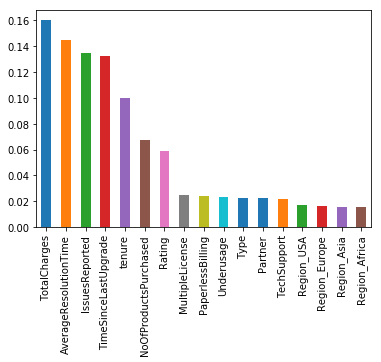

In [78]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

# RF GRID SEARCH

In [79]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Max number of levels in the tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [80]:
# Create the random grid
random_grid = { 'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, n_iter=100, cv=3, verbose = 2, random_state=101, 
                               n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   54.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 74,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [83]:
# Finalize using best
rf2 = RandomForestClassifier(n_estimators=235, oob_score=True, n_jobs=-1, random_state=101,)

In [84]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=235, n_jobs=-1,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [85]:
pred = rf2.predict(X_test)
pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1064
           1       0.49      0.51      0.50      1049

   micro avg       0.50      0.50      0.50      2113
   macro avg       0.50      0.50      0.50      2113
weighted avg       0.50      0.50      0.50      2113



In [88]:
rf2.oob_score_

0.49371196754563895

In [89]:
rf2.feature_importances_

array([0.02412086, 0.02299095, 0.09814161, 0.06483514, 0.02357079,
       0.02158581, 0.13221831, 0.02357245, 0.0161268 , 0.01599802,
       0.01642444, 0.01633961, 0.16076534, 0.06138283, 0.13368075,
       0.02364261, 0.1446037 ])

In [90]:
imp_feat2 = pd.Series(rf2.feature_importances_, index=X.columns.tolist())

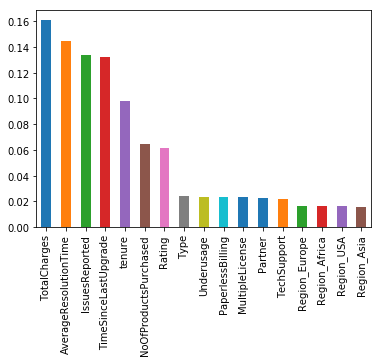

In [91]:
imp_feat2.sort_values(ascending=False).plot(kind='bar')